In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


# Boundary Condition #1
$$        \hat{\psi}_{+} \left( x,y \right) = \sum_{l=1}^{\infty} \left[\frac{2\alpha\psi_a}{\sinh\left( \kappa_{lm} a \right) }\sinh\left( \kappa_{lm} x \right) \cos\left( \frac{lmy}{a} \right)\right] - \overline{\psi}\cos\left( \mu x \right) + \frac{2\alpha \psi_a \gamma_s \kappa_m}{\mu \sinh\left( \kappa_m a \right) } \sin\left( \mu x \right) 
$$

Let $d_0=\frac{2\alpha \psi_a \gamma_s \kappa_m}{\mu \sinh\left( \kappa_m a \right) }$

$$k_x^2 \equiv \mu^2 - k_y^2= \mu^2 - \frac{l^2m^2}{a^2}$$

## Prescribed values for plotting
- $\gamma_s$
- $\psi_a$
- $\alpha$
- $\kappa, \mu$
- $\overline{\psi}$
- $m$
- $a$

In [4]:
def flux_function(X, Y, iterations=1, mode=1):
    # iterations = 1
    # mode = 1
    
    alpha = 0.003
    a = 1

    psi_a = 0.2
    psi_bar = 1
    gamma = 1

    mu = 0.1
    kappa_lm = lambda l: np.sqrt((l * mode)**2 / a**2 - mu**2)
    kappa_m = kappa_lm(1)

    c0 = -psi_bar
    d0 = 2*alpha*psi_a*gamma*kappa_m / (mu*np.sinh(kappa_m * a))

    c_lm = lambda l: 0
    d_lm = lambda l: 2*alpha*psi_a / np.sinh(kappa_lm(l) * a)

    ansatz_term = lambda l: (c_lm(l) * np.cosh(kappa_lm(l) * X) + d_lm(l) * np.sinh(kappa_lm(l) * X)) * np.cos(l*mode*Y / a)

    flux = 0
    for index in range(1, iterations+1):
        flux += ansatz_term(index)

    flux += c0 * np.cos(mu*X)
    flux += d0 * np.sin(mu*X)
    
    return flux

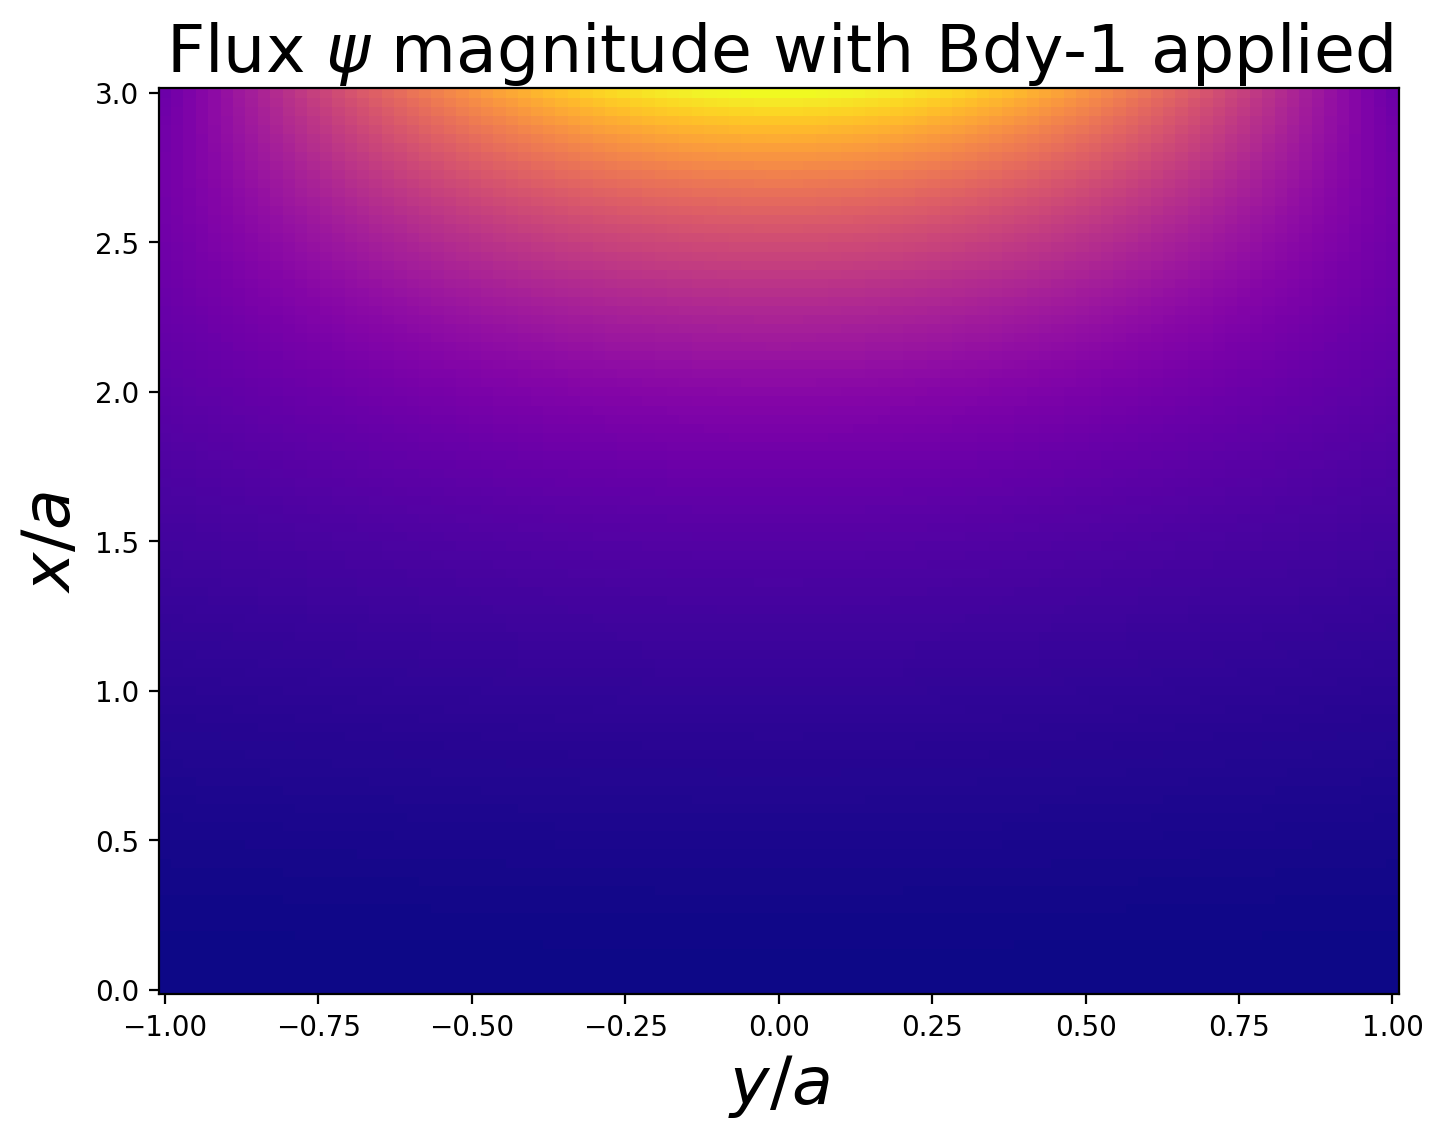

In [5]:
a = 1
X = np.linspace(0, 3*a, 100)
Y = np.linspace(-1*a, 1*a, 100)
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(figsize=(8, 6), dpi=200)


flux = flux_function(X, Y, iterations=2, mode=1)
ax.pcolormesh(Y, X, flux, cmap=cm.plasma)
ax.set_title('Flux $\psi$ magnitude with Bdy-1 applied', fontsize=24)
ax.set_ylabel('$x/a$', fontsize=24);
ax.set_xlabel('$y/a$', fontsize=24);
    

fig.savefig('bdy-1_general-solution.png', transparent=False)

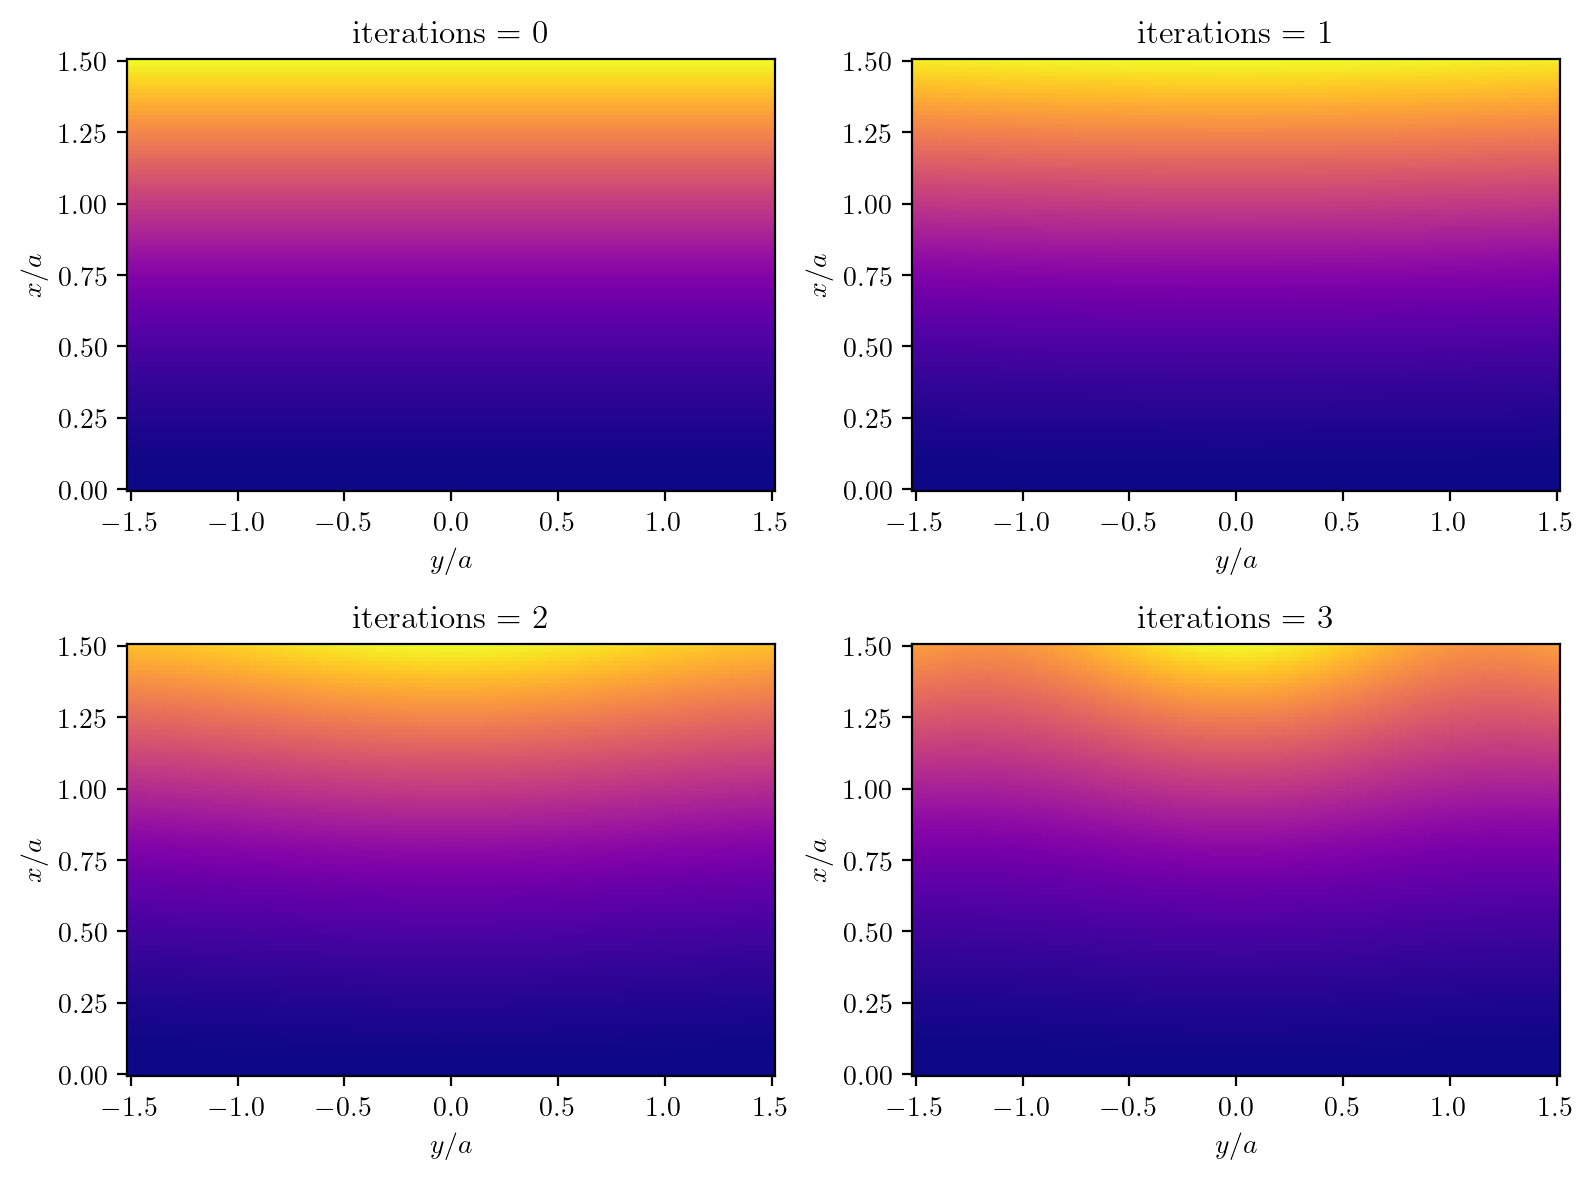

In [13]:
a = 0.5
X = np.linspace(0, 3*a, 100)
Y = np.linspace(-3*a, 3*a, 100)
X, Y = np.meshgrid(X, Y)

max_iterations = 4
fig, axs = plt.subplots(
    # subplot_kw={'projection' : '3d'}, 
    nrows=2, 
    ncols=max_iterations//2,
    figsize=(8, 6),
    dpi=200
)
axs = np.array(axs).reshape(-1)
def x_bdy(Y, iterations=1):
    a = 0.5
    alpha = 0.05
    mode = 1
    return a*(1 - alpha * np.cos(iterations*mode/a * Y))

for index, ax in np.ndenumerate(axs):
    flux = flux_function(X, Y, iterations=index[0], mode=1)
    # ax.plot_surface(X, Y, flux, cmap=cm.plasma)
    ax.pcolormesh(Y, X, flux, cmap=cm.plasma)
    ax.set_title(f'iterations = {index[0]}');
    ax.set_ylabel('$x/a$');
    ax.set_xlabel('$y/a$');
    
fig.tight_layout()
fig.savefig('bdy-1_general-solution.png')

# Boundary Condition \#2

$$x_{\text{bdy}}(y) = a\left(1-\alpha\cos{k_y y}\right)$$

In [6]:
from sympy import *

k_lm, a, alpha, x, y, c_lm, d_lm, k_y, l, m, c0, d0, mu = symbols('\kappa_{lm} a alpha x y c_{lm} d_{lm} k_y l m c_0 d_0 mu')

A_l = cosh(k_lm * a)
B_l = sinh(k_lm * a)
C_l = k_lm * a * alpha
cosine_factor = cos(l*m*y/a)
x_bdy = a * (1 - alpha * cos(k_y * y))

c_lm * cosh(k_lm * x_bdy) + d_lm * sinh(k_lm * x_bdy)

c_{lm}*cosh(\kappa_{lm}*a*(-alpha*cos(k_y*y) + 1)) + d_{lm}*sinh(\kappa_{lm}*a*(-alpha*cos(k_y*y) + 1))

In [7]:
# cosh term
c_lm * (A_l * cosh(C_l * cos(k_y * y)) - B_l * sinh(C_l * cos(k_y * y)))

c_{lm}*(-sinh(\kappa_{lm}*a)*sinh(\kappa_{lm}*a*alpha*cos(k_y*y)) + cosh(\kappa_{lm}*a)*cosh(\kappa_{lm}*a*alpha*cos(k_y*y)))

In [12]:
# sinh term
(d_lm * (B_l * cosh(C_l * cos(k_y * y)) - A_l * sinh(C_l * cos(k_y * y))))

d_{lm}*(sinh(\kappa_{lm}*a)*cosh(\kappa_{lm}*a*alpha*cos(k_y*y)) - sinh(\kappa_{lm}*a*alpha*cos(k_y*y))*cosh(\kappa_{lm}*a))

In [27]:
# cosh(cos(...))
cosh_cos = ((exp(exp(I*k_y*y)) * exp(-exp(-I*k_y*y)))**(C_l/2) + (exp(exp(I*k_y*y))* exp(exp(-I*k_y*y)))**(-C_l/2)) / 2
# sinh(cos(...))
sinh_cos = ((exp(exp(I*k_y*y)) * exp(-exp(-I*k_y*y)))**(C_l/2) - (exp(exp(I*k_y*y))* exp(exp(-I*k_y*y)))**(-C_l/2)) / 2

In [33]:
(d_lm * (B_l * cosh_cos - A_l * sinh_cos) + c_lm * (A_l * cosh_cos - B_l * sinh_cos))

c_{lm}*(-((exp(-exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)/2 - 1/(2*(exp(exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)))*sinh(\kappa_{lm}*a) + ((exp(-exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)/2 + 1/(2*(exp(exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)))*cosh(\kappa_{lm}*a)) + d_{lm}*(-((exp(-exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)/2 - 1/(2*(exp(exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)))*cosh(\kappa_{lm}*a) + ((exp(-exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)/2 + 1/(2*(exp(exp(-I*k_y*y))*exp(exp(I*k_y*y)))**(\kappa_{lm}*a*alpha/2)))*sinh(\kappa_{lm}*a))

### Relevant Trig Identities
- [Link](https://en.wikipedia.org/wiki/List_of_trigonometric_identities#Composition_of_trigonometric_functions)
$$\cos(t\cos{x})=J_0 (t) + 2\sum_{k=1}^\infty (-1)^k J_{2k}(t) \cos(2kx)$$
$$\sin(t\cos{x})=2\sum_{k=0}^\infty (-1)^k J_{2k+1} (t) \cos\left((2k+1)x\right)$$

$$c_0 \cos[\mu a (1-\alpha\cos(k_y y))]=c_0 \left[\cos{\mu a}\cos(\mu a \alpha\cos(k_y y))+\sin{\mu a}\sin(\mu a \alpha\cos(k_y y))\right]$$

$$\cos{\mu a}\cos(\mu a \alpha\cos(k_y y))=\cos{\mu a}\left[J_0(\mu a \alpha) + 2\sum_{n=1}^\infty J_{2n}(\mu a \alpha)\cos(2nk_y y)\right]$$

$$\sin{\mu a}\sin(\mu a \alpha\cos(k_y y))=\sin(\mu a)\left[2\sum_{n=0}^\infty (-1)^n J_{2n+1}(\mu a\alpha)\cos\left[(2n+1) k_y y\right]\right]$$


- 1st Kind Bessel Function Relation $$J_n(x)=(-1)^n J_{-n}(x)$$
- Equation (50a) in Dewar et al. $$\tilde{\psi}(x_{bdy}(y), y) = \psi_a -\overline{\psi};\, \forall y$$
- Equation (50b) (*ibid*) $$\tilde{\psi}(0,y)=\psi_{\text{cut}}-\overline{\psi}$$


$$M_0=c_0\cos{\mu a} + d_0\sin{\mu a}$$
$$N_0=c_0\sin{\mu a} - d_0\cos{\mu a}$$

$$M_{lm}=c_{lm}\cos(k_x^\prime a) - id_{lm}\sin(k_x^\prime a)$$
$$N_{lm}=c_{lm}\sin(k_x^\prime a) + id_{lm}\cos(k_x^\prime a)$$

With boundary conditions applied, the equation becomes $$M_0 \cos\left( \mu a \alpha \cos\left( k_y y \right)  \right) + N_0 \sin\left( \mu a \alpha \cos\left( k_y y \right)  \right) + \sum_{n=1}^{\infty} \left[ M_{lm} \cos\left( k_x^\prime a \alpha \cos\left( k_y y \right)\right) +N_{lm} \sin\left( k_x^\prime a \alpha \cos\left( k_y y \right)  \right) \right]$$

## Observations
- $d_0$ seems like a complex coefficient
- 

In [1]:
# to do
# plot
# compare with results in dewar (in the region of small alpha)
# taylor expansion of a bessel function α around α ~ 0 

# Taylor Expansion Approximation (up to $O(\alpha)$)

$$\hat{\psi}_+ (x,y)=-\overline{\psi} \cos{\mu x} + \frac{1}{\sin{\mu a}} \left[ \psi_a -\overline{\psi}-\frac{\overline F}{\mu}\left(1+\cos{\mu a}\right) + \overline{\psi}\cos{\mu a} \right] \sin{\mu x} + \overline{F}a\alpha \sin{\mu a} \left[\cos \left(\frac{my}{a}\right) \frac{\sinh{\kappa_m x}}{\sinh{\kappa_m a}} + \cos \left(\frac{2my}{a}\right) \frac{\sinh{2\kappa_m x}}{\sinh{2\kappa_m a}} \right]$$

In [ ]:
def flux_taylor(X, Y, iterations=1, mode=1):
    # iterations = 1
    # mode = 1
    
    alpha = 0.05
    a = 0.5

    psi_a = 1
    psi_bar = 1
    f_bar = 
    gamma = 400 * 0.05

    mu = 1
    kappa_lm = lambda l: np.sqrt((l * mode)**2 / a**2 - mu**2)
    kappa_m = kappa_lm(1)

    c0 = -psi_bar
    d0 = 1/np.sin(mu*a) * (psi_a - psi_bar -

    c_lm = lambda l: 0
    d_lm = lambda l: 2*alpha*psi_a / np.sinh(kappa_lm(l) * a)

    ansatz_term = lambda l: (c_lm(l) * np.cosh(kappa_lm(l) * X) + d_lm(l) * np.sinh(kappa_lm(l) * X)) * np.cos(l*mode*Y / a)

    flux = 0
    for index in range(1, iterations+1):
        flux += ansatz_term(index)

    flux += c0 * np.cos(mu*X)
    flux += d0 * np.sin(mu*X)
    
    return flux

59958491600.0